In [1]:
# import scikit-allel
import allel
# check which version is installed
print(allel.__version__)

1.3.6


In [2]:
#callset = allel.read_vcf('sel4.chr22.phase3_shapegenotypes.vcf.gz.recode.vcf.gz')
callset = allel.read_vcf('public_avatar_merged.vcf.gz')

In [3]:
sorted(callset.keys())

['calldata/GT',
 'samples',
 'variants/ALT',
 'variants/CHROM',
 'variants/FILTER_PASS',
 'variants/ID',
 'variants/POS',
 'variants/QUAL',
 'variants/REF']

In [4]:
callset['samples']

array(['HG00096', 'HG00097', 'HG00099', 'HG00100', 'HG00171', 'HG00173',
       'HG00174', 'HG00176', 'HG00403', 'HG00404', 'HG00406', 'HG00407',
       'HG00551', 'HG00553', 'HG00554', 'HG00637', 'HG00759', 'HG00766',
       'HG00844', 'HG00851', 'HG01112', 'HG01113', 'HG01119', 'HG01121',
       'HG01500', 'HG01501', 'HG01503', 'HG01504', 'HG01565', 'HG01566',
       'HG01571', 'HG01572', 'HG01583', 'HG01586', 'HG01589', 'HG01593',
       'HG01595', 'HG01596', 'HG01597', 'HG01598', 'HG01879', 'HG01880',
       'HG01882', 'HG01883', 'HG02461', 'HG02462', 'HG02464', 'HG02465',
       'HG02922', 'HG02923', 'HG02938', 'HG02941', 'HG03006', 'HG03007',
       'HG03009', 'HG03012', 'HG03052', 'HG03054', 'HG03055', 'HG03057',
       'HG03642', 'HG03643', 'HG03644', 'HG03645', 'HG03713', 'HG03714',
       'HG03716', 'HG03717', 'NA06984', 'NA06985', 'NA06986', 'NA06989',
       'NA18486', 'NA18488', 'NA18489', 'NA18498', 'NA18525', 'NA18526',
       'NA18528', 'NA18530', 'NA18939', 'NA18940', 

In [5]:
callset['variants/POS']

array([16050075, 16050115, 16050213, ..., 51244163, 51244205, 51244237],
      dtype=int32)

In [6]:
gt = allel.GenotypeArray(callset['calldata/GT'])
gt

<GenotypeArray shape=(1103547, 105, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [7]:
ac = gt.count_alleles()
ac

<AlleleCountsArray shape=(1103547, 9) dtype=int32>
210   0   0   0   0   0   0   0   0
209   1   0   0   0   0   0   0   0
209   1   0   0   0   0   0   0   0
...
207   3   0   0   0   0   0   0   0
210   0   0   0   0   0   0   0   0
209   1   0   0   0   0   0   0   0

In [8]:
import random
random.seed(42)
import time
import numpy as np
np.random.seed(42)
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
#import bcolz => package not necessary and could not be installed
import pandas
import allel; print('scikit-allel', allel.__version__)
# %reload_ext memory_profiler

scikit-allel 1.3.6


In [9]:
gt

<GenotypeArray shape=(1103547, 105, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [10]:
ac = gt.count_alleles()[:]

In [11]:
ac

<AlleleCountsArray shape=(1103547, 9) dtype=int32>
210   0   0   0   0   0   0   0   0
209   1   0   0   0   0   0   0   0
209   1   0   0   0   0   0   0   0
...
207   3   0   0   0   0   0   0   0
210   0   0   0   0   0   0   0   0
209   1   0   0   0   0   0   0   0

In [12]:
#flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 1) # This is remove singleton
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 5) # This is for more strict MAF cutoff


gf = gt.compress(flt, axis=0)
gf

<GenotypeArray shape=(139294, 105, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 1/0 1/0 0/0 0/0 ... 0/1 0/0 0/0 0/0 0/0
0/1 0/0 0/0 0/0 1/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [13]:
gn = gf.to_n_alt()
gn

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [14]:
n = 100000  # number of SNPs to choose randomly
#n = 10000
#n = 1000
vidx = np.random.choice(gn.shape[0], n, replace=False)
vidx.sort()
gnr = gn.take(vidx, axis=0)
gnr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [15]:
coords1, model1 = allel.pca(gnr, n_components=10, scaler='patterson')
coords2, model2 = allel.pca(gnr, n_components=6, scaler='patterson')
coords3, model3 = allel.pca(gnr, n_components=4, scaler='patterson')
coords4, model4 = allel.pca(gnr, n_components=10, scaler=None)

print(model1.explained_variance_ratio_)
print(model2.explained_variance_ratio_)
print(model3.explained_variance_ratio_)
print(model4.explained_variance_ratio_)


[0.1034116  0.04082178 0.0185409  0.01685901 0.01511698 0.01430466
 0.01391242 0.01378697 0.01349845 0.01309875]
[0.1034116  0.04082178 0.0185409  0.01685901 0.01511698 0.01430466]
[0.1034116  0.04082178 0.0185409  0.01685901]
[0.10239684 0.05000737 0.02130299 0.01938763 0.01414445 0.01386177
 0.01324054 0.01264187 0.01227303 0.01198912]


In [16]:
# cont labels
df_cont = pandas.read_csv('continental.txt', delimiter='\t', index_col='Population')
df_cont.head()

,Population Description,Continental,Sequence Data Available,Alignment Data Available,Variant Data Available
Population,,,,,
CHB,"Han Chinese in Beijing, China",EAS,1,1,1
JPT,"Japanese in Tokyo, Japan",EAS,1,1,1
CHS,Southern Han Chinese,EAS,1,1,1
CDX,"Chinese Dai in Xishuangbanna, China",EAS,1,1,1
KHV,"Kinh in Ho Chi Minh City, Vietnam",EAS,1,1,1


In [17]:
# pop labels
df_samples = pandas.read_csv('integrated_call_samples_v2.20130502.ALL.ped.txt', delimiter='\t', index_col='Individual ID')
df_samples = df_samples.join(df_cont, on='Population')
# df_samples.tail(10)

In [18]:
# mydf = pandas.merge(df_samples, df_samples)
df_gnu = pandas.DataFrame(data=coords1, index=callset['samples'])
df_gnu

,0,1,2,3,4,5,6,7,8,9
HG00096,-76.811653,139.376114,119.586967,-28.628712,-24.626738,60.829365,-90.373367,5.823133,23.111525,-96.682053
HG00097,-89.260231,101.762726,55.298019,-76.634125,7.805068,0.197462,9.402221,-18.025694,8.004932,-10.891384
HG00099,-79.242455,115.796234,41.925098,-35.908398,-13.494594,7.187465,-18.110716,21.577297,9.745396,-24.580605
HG00100,-72.472282,128.679169,78.301216,-57.909233,-1.149531,12.349135,-24.980774,30.135498,-4.605790,-9.036454
HG00171,-99.670921,84.896156,55.139874,-18.900536,-3.386601,12.346075,-7.904860,-5.027943,-11.046386,4.146145
...,...,...,...,...,...,...,...,...,...,...
NA20845,-82.632614,24.868097,-143.902725,6.810176,11.407437,-16.959602,23.151068,-8.074821,-1.461397,-11.475471
NA20846,-83.305679,44.441460,-85.557228,-3.860818,21.990305,11.925923,-0.817148,1.014987,-22.167700,-13.532815
NA20847,-86.654343,34.142235,-104.143242,-51.575047,8.492846,-28.782743,-15.172232,-20.112886,10.076681,-16.270899
NA20849,-69.129486,13.818551,-106.599686,-2.573889,6.676627,-19.460863,15.063910,-33.382038,28.842199,-33.493111


In [19]:
pca_samples = df_gnu.join(df_samples)

In [20]:
# pops = pandas.merge(df_gnu, df_samples, on=['']) 
continents = pca_samples.Continental.unique()
cont_colours = plt.cm.rainbow(np.linspace(0, 1, len(continents)))


In [21]:
# playing with filtering
continents
pca_samples_cont_filtered = pca_samples[pca_samples['Continental'] == 'AMR']
pca_samples_cont_filtered.head()

,0,1,2,3,4,5,6,7,8,9,...,Other Comments,phase 3 genotypes,related genotypes,omni genotypes,affy_genotypes,Population Description,Continental,Sequence Data Available,Alignment Data Available,Variant Data Available
HG00551,-67.678116,103.137115,66.826393,-6.568776,-4.392508,10.366468,-19.891747,-23.571762,34.876137,-3.982480,...,0,1,0,1,1,Puerto Ricans from Puerto Rico,AMR,1.0,1.0,1.0
HG00553,43.348198,57.861443,22.996080,78.031357,-79.732208,-14.262753,25.691278,3.992856,56.554901,29.296753,...,0,1,0,1,1,Puerto Ricans from Puerto Rico,AMR,1.0,1.0,1.0
HG00554,-72.983704,103.689232,59.480778,5.627817,-7.199296,9.763540,-15.261311,15.591911,-13.474539,-3.839196,...,0,1,0,1,1,Puerto Ricans from Puerto Rico,AMR,1.0,1.0,1.0
HG00637,-39.766575,66.001160,50.084808,37.103386,-13.755093,-4.331111,20.142345,-10.224022,0.289908,13.295321,...,0,1,0,1,1,Puerto Ricans from Puerto Rico,AMR,1.0,1.0,1.0
HG01112,-67.278961,97.540939,38.515446,-33.632431,11.307245,-11.435837,-12.964475,-10.164637,14.133110,-6.391838,...,0,1,0,1,1,"Colombians from Medellin, Colombia",AMR,1.0,1.0,1.0


In [22]:
populations = pca_samples_cont_filtered.Population.unique()
pop_colours = plt.cm.rainbow(np.linspace(0, 1, len(populations)))

In [23]:
pca_samples.head()

,0,1,2,3,4,5,6,7,8,9,...,Other Comments,phase 3 genotypes,related genotypes,omni genotypes,affy_genotypes,Population Description,Continental,Sequence Data Available,Alignment Data Available,Variant Data Available
HG00096,-76.811653,139.376114,119.586967,-28.628712,-24.626738,60.829365,-90.373367,5.823133,23.111525,-96.682053,...,0,1,0,1,1,British in England and Scotland,EUR,1.0,1.0,1.0
HG00097,-89.260231,101.762726,55.298019,-76.634125,7.805068,0.197462,9.402221,-18.025694,8.004932,-10.891384,...,0,1,0,1,1,British in England and Scotland,EUR,1.0,1.0,1.0
HG00099,-79.242455,115.796234,41.925098,-35.908398,-13.494594,7.187465,-18.110716,21.577297,9.745396,-24.580605,...,0,1,0,1,1,British in England and Scotland,EUR,1.0,1.0,1.0
HG00100,-72.472282,128.679169,78.301216,-57.909233,-1.149531,12.349135,-24.980774,30.135498,-4.605790,-9.036454,...,0,1,0,1,1,British in England and Scotland,EUR,1.0,1.0,1.0
HG00171,-99.670921,84.896156,55.139874,-18.900536,-3.386601,12.346075,-7.904860,-5.027943,-11.046386,4.146145,...,0,1,0,1,1,Finnish in Finland,EUR,1.0,1.0,1.0


In [24]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population, pops, pop_colors):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop,color in zip(pops, pop_colors):
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=color, 
                label=pop, markersize=6, mec='k', mew=.5)

#        ax.scatter(x[flt], y[flt]) #, s=50) color=color

    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca_cont(ax1, ax2, coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = pca_samples.Continental.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    plot_pca_coords(coords, model, 0, 1, ax1, sample_population, continents, cont_colours)
    #plot_pca_coords(coords, model, 2, 3, ax2, sample_population, continents, cont_colours)
    fig.suptitle(title)
    fig.tight_layout()


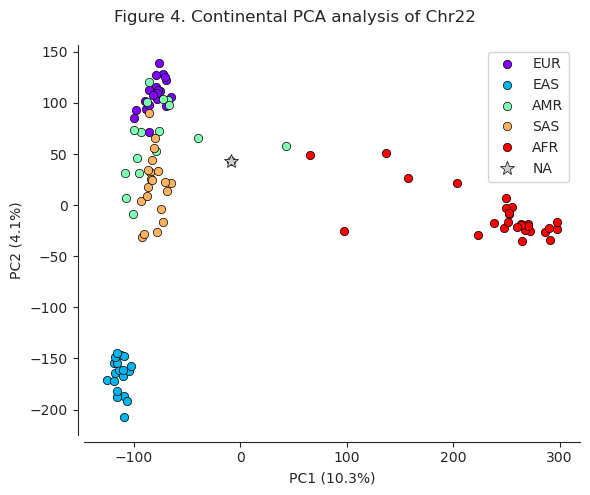

In [25]:
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(1, 1, 1)
#ax2 = fig.add_subplot(1, 2, 2)
ax2=None
fig_pca_cont(ax1, ax2, coords1, model1, 'Figure 4. Continental PCA analysis of Chr22')

ax1.plot(coords1[104,0], coords1[104,1], marker='*', linestyle=' ', color='0.8', label='NA', markersize=10, mec='k', mew=0.5)
#ax2.plot(coords1[104,2], coords1[104,3], marker='*', linestyle=' ', color='0.8', label='NA', markersize=10, mec='k', mew=0.5)
#ax1.invert_xaxis()
#ax1.invert_yaxis()

ax1.legend(bbox_to_anchor=(0.8,1), loc='upper left')
fig.savefig("continental_plot.png")

In [26]:
def fig_pca_pop(ax1, ax2, coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = pca_samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    plot_pca_coords(coords, model, 0, 1, ax1, sample_population, populations, pop_colours)
    #plot_pca_coords(coords, model, 2, 3, ax2, sample_population, populations, pop_colours)
    fig.suptitle(title)
    fig.tight_layout()
    

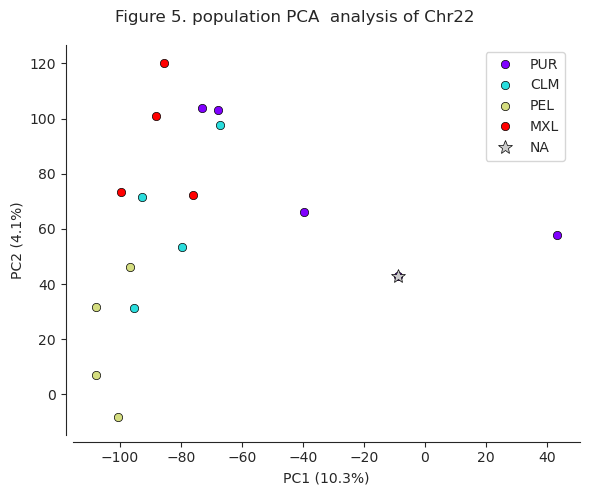

In [27]:


fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax2=None
#ax2 = fig.add_subplot(1, 2, 2)

fig_pca_pop(ax1, ax2, coords1, model1, 'Figure 5. population PCA  analysis of Chr22')

ax1.plot(coords1[104,0], coords1[104,1], marker='*', linestyle=' ', color='0.8', label='NA', markersize=10, mec='k', mew=0.5)
#ax2.plot(coords1[104,3], coords1[104,4], marker='*', linestyle=' ', color='0.8', label='NA', markersize=10, mec='k', mew=0.5)
#ax1.invert_xaxis()
#ax1.invert_yaxis()
ax1.legend(bbox_to_anchor=(0.8,1), loc='upper left')

fig.savefig("population_plot.png")